In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import yaml
import pandas as pd

# Path to modules
sys.path.append('../modules')

# Import my modules
from plotter import draw_basemap, add_subregion_boxes, make_cmap
from markovchain import MarkovChain, transition_matrix

In [2]:
# Set up paths

path_to_data = '/home/nash/DATA/data/'                            # project data -- read only
path_to_out  = '/home/nash/DATA/repositories/AR_types/out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '/home/nash/DATA/repositories/AR_types/figs/'      # figures


In [3]:
# import configuration file for dictionary choice
yaml_doc = '../data/config.yml'

config = yaml.load(open(yaml_doc), Loader=yaml.SafeLoader)

# djf_dict mam_dict djfmam_dict
ar_dict = config['mam']

In [4]:
fname_id = 'HUV500t0120050cor'
filepath = path_to_out + fname_id + 'hma_AR-types-' + ar_dict['ssn'] + '.csv'

df = pd.read_csv(filepath)
df

,Unnamed: 0,AR_CAT
0,1979-03-01 09:00:00,0
1,1979-03-02 09:00:00,0
2,1979-03-03 09:00:00,0
3,1979-03-04 09:00:00,0
4,1979-03-05 09:00:00,0
...,...,...
3675,2018-05-27 09:00:00,0
3676,2018-05-28 09:00:00,0
3677,2018-05-29 09:00:00,0
3678,2018-05-30 09:00:00,0


In [5]:
# run with AR_CAT data
t = df.AR_CAT.values.tolist()
m = transition_matrix(t)
for row in m: print(' '.join('{0:.2f}'.format(x) for x in row))

0.92 0.03 0.02 0.03
0.56 0.36 0.07 0.01
0.55 0.02 0.40 0.02
0.58 0.04 0.01 0.36


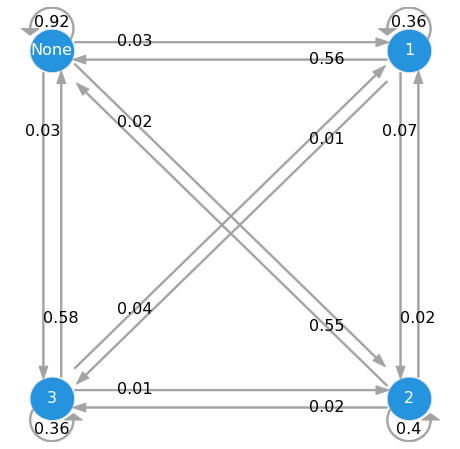

In [6]:
P = np.array(m) # Transition matrix as array
P = np.round(P, 2) # Round decimals to two places
mc = MarkovChain(P, ['None', '1', '2', '3'])
# save plot
filepath = path_to_figs + fname_id +  ar_dict['ssn'] + '_markov'+ '.png'
mc.draw(img_path=filepath)